In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

**After doing some preliminary investigation on the datasets available, I figured out that we need to look at data by combining relevant datasets**

So, I first started with 
**merging projects and outcomes dataset**

**Let's load the datasets**
1. projects.csv
2. outcomes.csv

In [37]:
projects = pd.read_csv('projects.csv')
outcomes = pd.read_csv('outcomes.csv')

In [38]:
print('projects shape', projects.shape, "\n", 'outcomes shape', outcomes.shape)

projects shape (664098, 35) 
 outcomes shape (619326, 12)


**Let us see what variable both these datasets contain,
and find out a common variable to merge the datasets**

In [39]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664098 entries, 0 to 664097
Data columns (total 35 columns):
projectid                                 664098 non-null object
teacher_acctid                            664098 non-null object
schoolid                                  664098 non-null object
school_ncesid                             621362 non-null float64
school_latitude                           664098 non-null float64
school_longitude                          664098 non-null float64
school_city                               664098 non-null object
school_state                              664098 non-null object
school_zip                                664094 non-null float64
school_metro                              582190 non-null object
school_district                           663150 non-null object
school_county                             664081 non-null object
school_charter                            664098 non-null object
school_magnet                           

In [40]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619326 entries, 0 to 619325
Data columns (total 12 columns):
projectid                                         619326 non-null object
is_exciting                                       619326 non-null object
at_least_1_teacher_referred_donor                 524928 non-null object
fully_funded                                      619326 non-null object
at_least_1_green_donation                         524928 non-null object
great_chat                                        619326 non-null object
three_or_more_non_teacher_referred_donors         524928 non-null object
one_non_teacher_referred_donor_giving_100_plus    524928 non-null object
donation_from_thoughtful_donor                    524928 non-null object
great_messages_proportion                         439487 non-null float64
teacher_referred_count                            524928 non-null float64
non_teacher_referred_count                        524928 non-null float64
dtypes: fl

**We see that the 'projectid' column is common to both datasets so, we merge these two datasets on that column**

In [41]:
prjts_plus_outcms = pd.merge(projects, outcomes, on='projectid')

In [42]:
prjts_plus_outcms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619326 entries, 0 to 619325
Data columns (total 46 columns):
projectid                                         619326 non-null object
teacher_acctid                                    619326 non-null object
schoolid                                          619326 non-null object
school_ncesid                                     580478 non-null float64
school_latitude                                   619326 non-null float64
school_longitude                                  619326 non-null float64
school_city                                       619326 non-null object
school_state                                      619326 non-null object
school_zip                                        619322 non-null float64
school_metro                                      543838 non-null object
school_district                                   618404 non-null object
school_county                                     619309 non-null object
school_ch

**Let's try to explore this new combined dataset**

# A. Dealing with missing values and NaN's

1. [Using the MSNO (missingno) package for missing values analysis](#Using-the-MSNO-(missingno)-package-for-missing-values-analysis)



**Step 1:** finding columns with  missing values.

let's write a function that returns which columns have how many missing values and what % of the total rows in that 
column correspond to missing/NaN values

In [43]:
def nan_pct(df=None,):
    '''
    input: Pandas DataFrame
    
    output: table representing which columns have missing/Nan values and what %
    
    example:
    nan_pct(df)
    
    parameters:
    dataframe: the dataframe you want to find the nan columns
    '''
    
    
    col_dict = {}
    
    for col in df.columns:
        if np.sum(df[col].isna()) != 0:
            col_dict[col] = np.sum(df[col].isna()), (np.sum(df[col].isna())/len(df[col]))*100
        
    dfm = pd.DataFrame(col_dict, index=['total Nans', '% nans'])
    

    
    return(dfm.T)

In [44]:
nan_pct(prjts_plus_outcms)

,total Nans,% nans
school_ncesid,38848.0,6.272625
school_zip,4.0,0.000646
school_metro,75488.0,12.188734
school_district,922.0,0.148872
school_county,17.0,0.002745
primary_focus_subject,36.0,0.005813
primary_focus_area,36.0,0.005813
secondary_focus_subject,193949.0,31.316140
secondary_focus_area,193949.0,31.316140
resource_type,43.0,0.006943


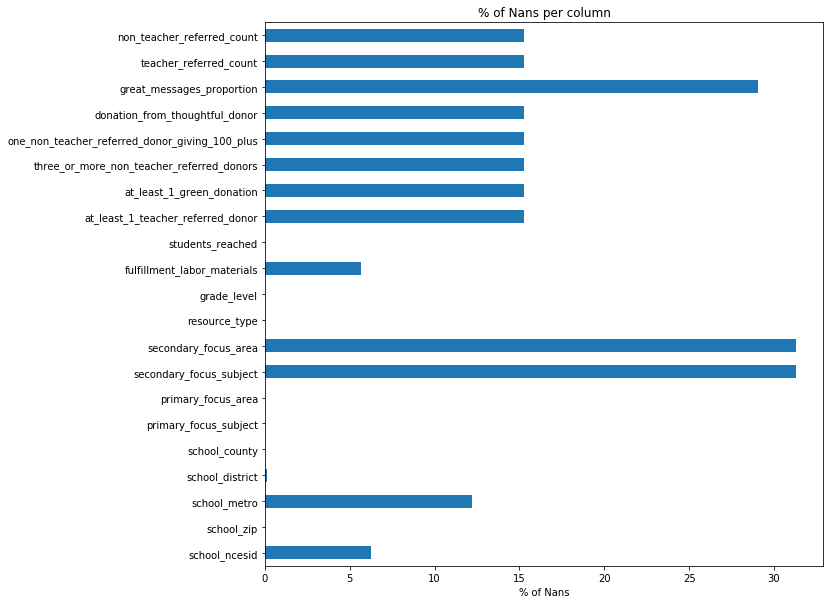

In [45]:
fig = plt.figure(figsize=[10,10])
ax= nan_pct(prjts_plus_outcms)['% nans'].plot(kind='barh',)
ax.set_title('% of Nans per column')
ax.set_xlabel('% of Nans')
plt.show()
#nan_pct(prjts_plus_outcms)['% nans'].plot(kind='barh')

### 1. Using the MSNO (missingno) package for missing values analysis
<a id='Using-the-MSNO-(missingno)-package-for-missing-values-analysis'></a>

**Motivation for using the package**

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python

In [46]:

import missingno as msno

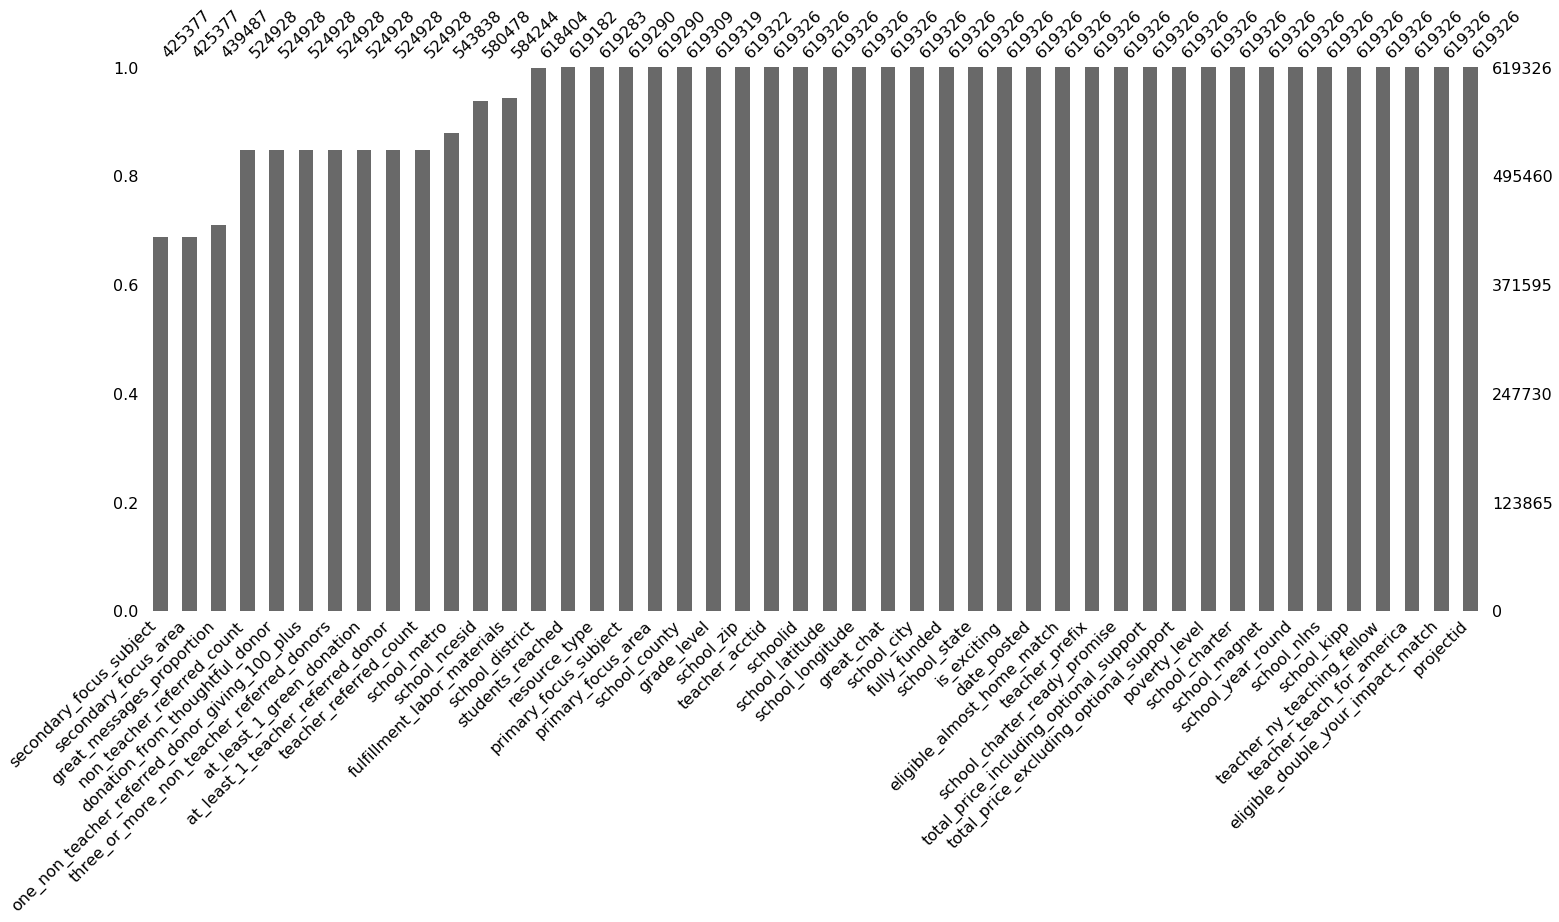

In [47]:
msno.bar(prjts_plus_outcms, sort='ascending')

**from the above we observe that first 13 feature have a good amount of Nans in them**

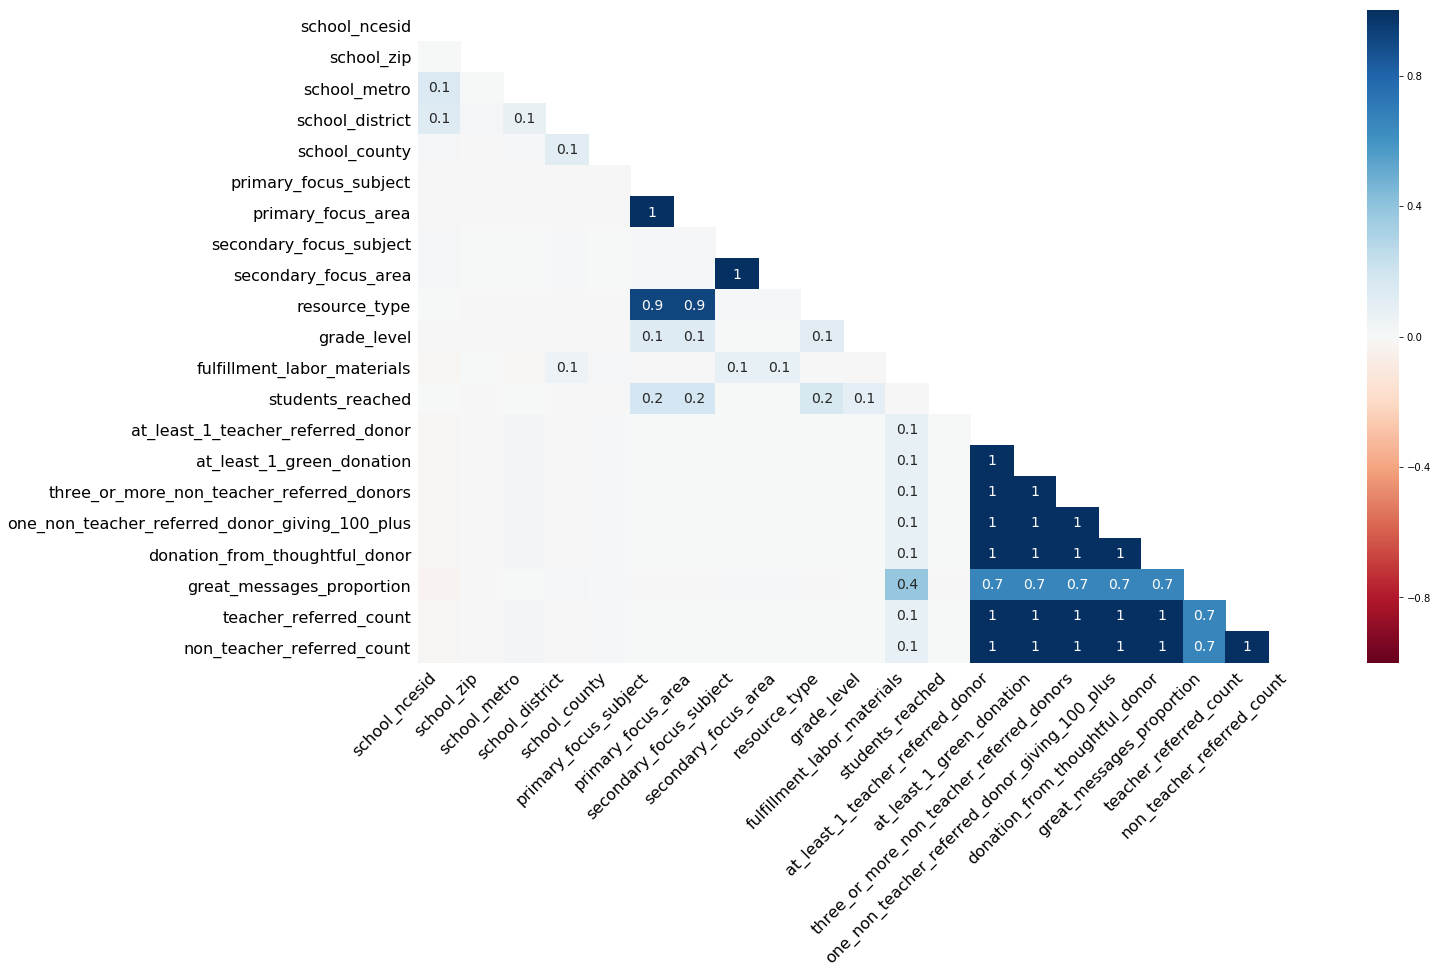

In [48]:
msno.heatmap(prjts_plus_outcms)

**The above plot tells us the corelation between the columns missing values**

 a correlation value of 1 means that both the columns have similar number of missing values

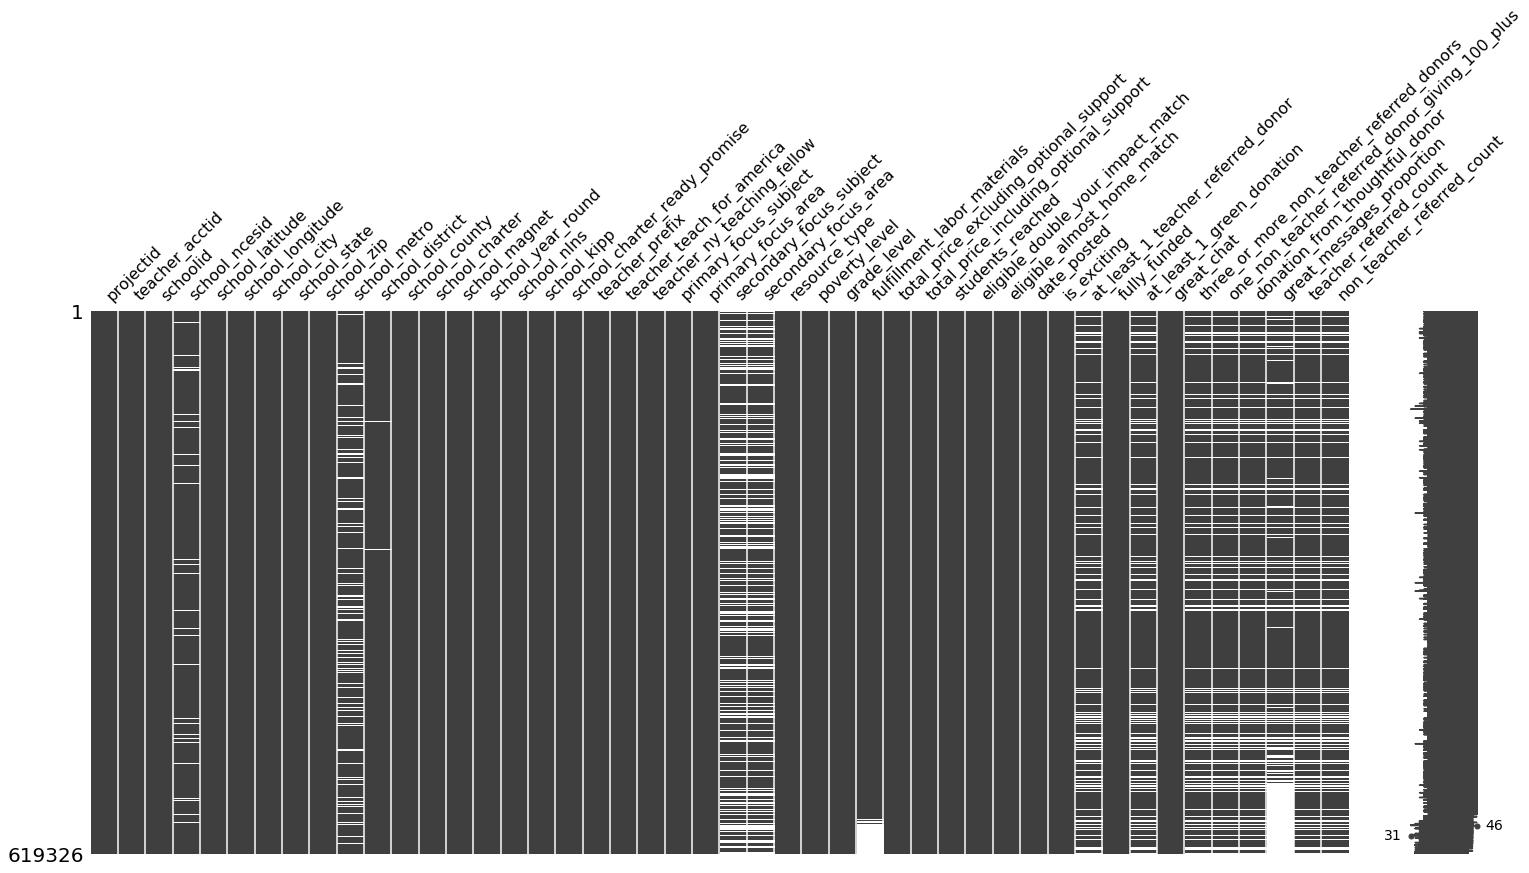

In [49]:
msno.matrix(prjts_plus_outcms)

**The above plot shows the missing values in each row for a given column by the white spaces**

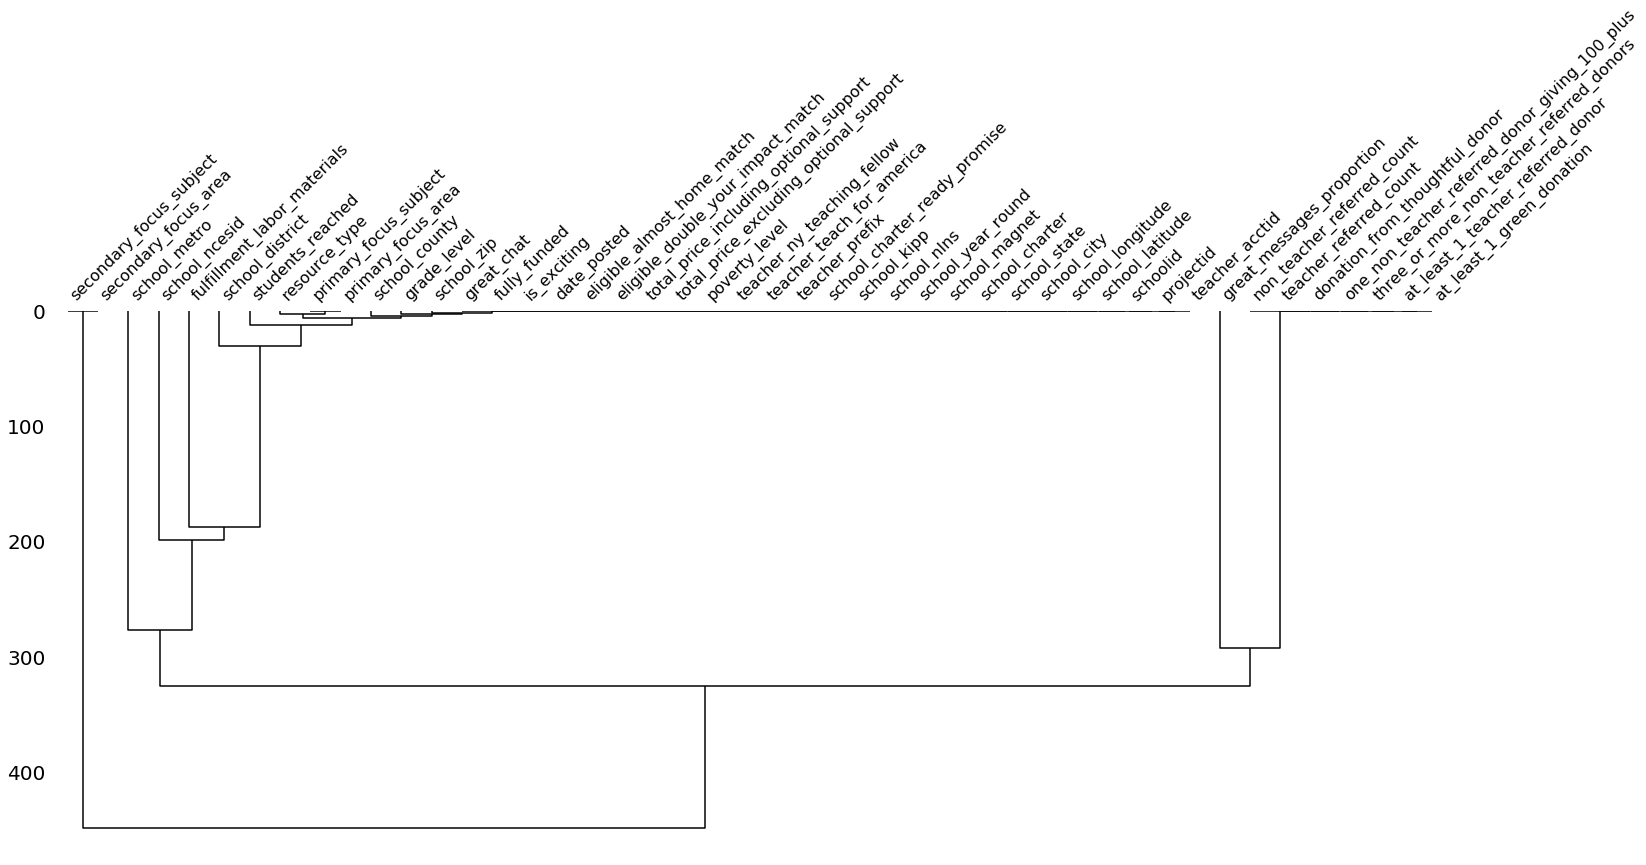

In [50]:
msno.dendrogram(prjts_plus_outcms)

**Conclusion**
From the heatmap and the matrix map we see that some columns have missing values at similar locations for all of them.
Which signifies strong missing correlation between them.

**Which brings me to a conclusion that the data missing from those column is MNAR (Missing Not at Random) that means there is definitely some reason why thoe values are missing**

In [77]:
#convert date to datetime object
prjts_plus_outcms['date_posted'] = pd.to_datetime(prjts_plus_outcms['date_posted'],)

### 2. Data Visualization